# Data Mining Project

## Yonatan Golan, Ziv Chaba

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pydotplus
from sklearn import svm
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import GridSearchCV

import warnings # Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [2]:
%matplotlib inline
sns.set(color_codes=True) 
sns.set(rc={'figure.figsize':(5,5)}) 

## 1. Data information:

In [3]:
train_df = pd.read_csv("./hotels_train.csv")
train_df.head()

ID  weekend_nights  week_nights    room_type  board_type  n_adults  \
0  INN09588               1            5  Room_Type 1  half board         2   
1  INN07691               0            3  Room_Type 1         NaN         2   
2  INN32192               0            2  Room_Type 4  half board         1   
3  INN32218               1            2  Room_Type 1         NaN         2   
4  INN02994               1            3  Room_Type 4  half board         2   

   n_less_12  n_more_12  booked_tour  n_requests  lead_time purchase_type  \
0          0          0            0           2       34.0        Online   
1          0          0            0           0      365.0           NaN   
2          0          0            0           1      148.0        Online   
3          0          0            0           0      502.0       Offline   
4          0          1            0           2       32.0       Offline   

   n_p_cacellation  n_p_not_cacellation  repeated  price        date  \
0                0                    0         0  108.4  11/28/2018   
1                0                    0         0    NaN  11/03/2018   
2                0                    0         0  137.3  05/06/2018   
3                0                    0         0  127.0   9/26/2018   
4                0                    0         0  110.0  10/19/2017   

   is_canceled  
0            0  
1            1  
2            0  
3            1  
4            0

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [5]:
train_df.describe(include='all')

ID  weekend_nights   week_nights    room_type  board_type  \
count      27213    27213.000000  27213.000000        27213       19045   
unique     27213             NaN           NaN            7           4   
top     INN09588             NaN           NaN  Room_Type 1  half board   
freq           1             NaN           NaN        21084       14591   
mean         NaN        0.812810      2.197332          NaN         NaN   
std          NaN        0.869317      1.403576          NaN         NaN   
min          NaN        0.000000      0.000000          NaN         NaN   
25%          NaN        0.000000      1.000000          NaN         NaN   
50%          NaN        1.000000      2.000000          NaN         NaN   
75%          NaN        2.000000      3.000000          NaN         NaN   
max          NaN        7.000000     17.000000          NaN         NaN   

            n_adults     n_less_12     n_more_12   booked_tour    n_requests  \
count   27213.000000  27213.000000  27213.000000  27213.000000  27213.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        1.845221      0.052989      0.053357      0.031750      0.621100   
std         0.519715      0.266150      0.268688      0.175336      0.785642   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         2.000000      0.000000      0.000000      0.000000      0.000000   
50%         2.000000      0.000000      0.000000      0.000000      0.000000   
75%         2.000000      0.000000      0.000000      0.000000      1.000000   
max         4.000000      6.000000      4.000000      1.000000      5.000000   

           lead_time purchase_type  n_p_cacellation  n_p_not_cacellation  \
count   26794.000000         22366     27213.000000         27213.000000   
unique           NaN             5              NaN                  NaN   
top              NaN        Online              NaN                  NaN   
freq             NaN         14306              NaN                  NaN   
mean      102.952377           NaN         0.021975             0.155404   
std       103.498942           NaN         0.346697             1.728693   
min         0.000000           NaN         0.000000             0.000000   
25%        21.000000           NaN         0.000000             0.000000   
50%        69.000000           NaN         0.000000             0.000000   
75%       153.000000           NaN         0.000000             0.000000   
max       532.000000           NaN        13.000000            57.000000   

            repeated         price        date   is_canceled  
count   27213.000000  23808.000000       27213  27213.000000  
unique           NaN           NaN         553           NaN  
top              NaN           NaN  10/13/2018           NaN  
freq             NaN           NaN         188           NaN  
mean        0.026421    123.455494         NaN      0.327674  
std         0.160387     35.136566         NaN      0.469374  
min         0.000000     20.000000         NaN      0.000000  
25%         0.000000    100.300000         NaN      0.000000  
50%         0.000000    119.450000         NaN      0.000000  
75%         0.000000    140.000000         NaN      1.000000  
max         1.000000    560.000000         NaN      1.000000

From the information above we can learn about missing values, attributes data type and unmatched data type.
- Missing values: for the attributes 'board_type', 'lead_time', 'purchase_type', and 'price'.
- Unmatched data type: for the attribute 'room_type' the data type is object and it should be a numeric for, we need to convert it.
- unique, top and freq relevent to data from object type

In [6]:
train_df['room_type'] = train_df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)  #d - numeric values
train_df['room_type'].dtype

dtype('int32')

#### Split to attributes and taget

In [7]:
train_target =pd.DataFrame(train_df['is_canceled']) 
train_df = train_df.drop(['ID'], axis=1)
train_df

weekend_nights  week_nights  room_type  board_type  n_adults  \
0                   1            5          1  half board         2   
1                   0            3          1         NaN         2   
2                   0            2          4  half board         1   
3                   1            2          1         NaN         2   
4                   1            3          4  half board         2   
...               ...          ...        ...         ...       ...   
27208               1            2          1         NaN         3   
27209               0            4          1  half board         2   
27210               0            2          1         NaN         2   
27211               1            0          4  half board         1   
27212               0            2          1   breakfast         2   

       n_less_12  n_more_12  booked_tour  n_requests  lead_time purchase_type  \
0              0          0            0           2       34.0        Online   
1              0          0            0           0      365.0           NaN   
2              0          0            0           1      148.0        Online   
3              0          0            0           0      502.0       Offline   
4              0          1            0           2       32.0       Offline   
...          ...        ...          ...         ...        ...           ...   
27208          0          0            0           1      106.0           NaN   
27209          0          0            0           1       18.0        Online   
27210          0          0            0           0      147.0       Offline   
27211          0          0            0           0        3.0      Aviation   
27212          0          0            0           0      328.0       Offline   

       n_p_cacellation  n_p_not_cacellation  repeated  price        date  \
0                    0                    0         0  108.4  11/28/2018   
1                    0                    0         0    NaN  11/03/2018   
2                    0                    0         0  137.3  05/06/2018   
3                    0                    0         0  127.0   9/26/2018   
4                    0                    0         0  110.0  10/19/2017   
...                ...                  ...       ...    ...         ...   
27208                0                    0         0    NaN   7/18/2018   
27209                0                    0         0  113.0   2/24/2018   
27210                0                    0         0  105.0   4/15/2018   
27211                0                    0         0  130.0   5/22/2018   
27212                0                    0         0  129.0   7/17/2017   

       is_canceled  
0                0  
1                1  
2                0  
3                1  
4                0  
...            ...  
27208            0  
27209            0  
27210            1  
27211            1  
27212            1  

[27213 rows x 17 columns]

#### Split to nominal and numerical attributes

In [8]:
numeric_col = train_df.describe().columns # to get the numeric columns
numeric_col

Index(['weekend_nights', 'week_nights', 'room_type', 'n_adults', 'n_less_12',
       'n_more_12', 'booked_tour', 'n_requests', 'lead_time',
       'n_p_cacellation', 'n_p_not_cacellation', 'repeated', 'price',
       'is_canceled'],
      dtype='object')

In [9]:
numeric_data = train_df[numeric_col]
nominal_data = train_df.drop(numeric_col, axis=1)
nominal_data.describe().columns # to get the nominal columns

Index(['board_type', 'purchase_type', 'date'], dtype='object')

## 2. Data statistics:

### Nominal data:
For nominal data we would like to know how many unique values there are and the distribution.

In [10]:
nominal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   board_type     19045 non-null  object
 1   purchase_type  22366 non-null  object
 2   date           27213 non-null  object
dtypes: object(3)
memory usage: 637.9+ KB


Describe function for nomiunal data show information about unique value, top value and the top value frequency.

In [11]:
describe_df = nominal_data.describe()
describe_df

board_type purchase_type        date
count        19045         22366       27213
unique           4             5         553
top     half board        Online  10/13/2018
freq         14591         14306         188

Adding the top value frequency in percent.

In [12]:
describe_df.loc['%freq'] = describe_df.apply(lambda x: np.round(x.loc['freq']/x.loc['count'], decimals=3))
describe_df

board_type purchase_type        date
count        19045         22366       27213
unique           4             5         553
top     half board        Online  10/13/2018
freq         14591         14306         188
%freq        0.766          0.64       0.007

#### Histograms
The column 'date' has too many unique values so there is no reason to look on his histogram.

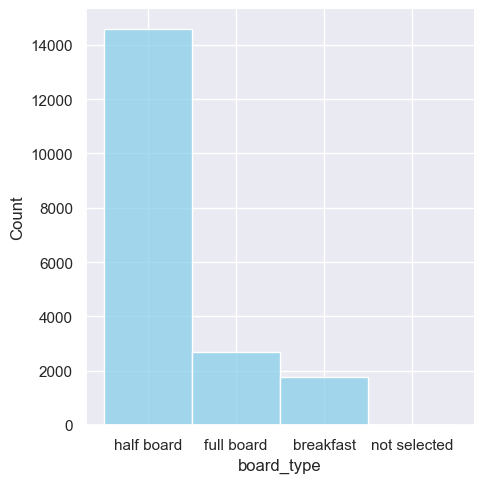

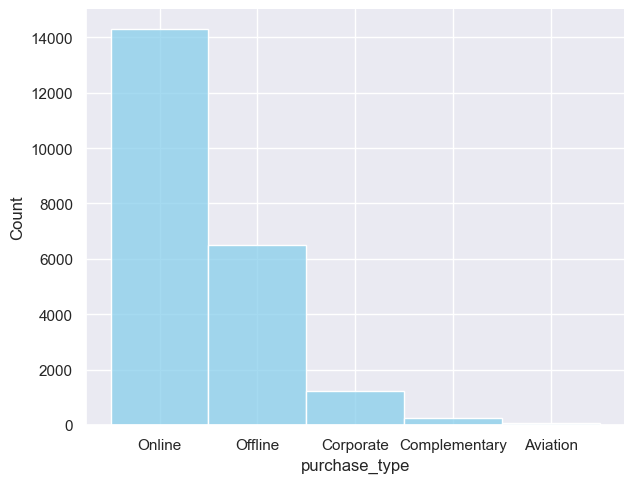

In [13]:
sns.displot(nominal_data, x='board_type', color='skyblue')
sns.displot(nominal_data, x='purchase_type',aspect=1.3, color='skyblue')

we converting those values to numeric values (missing values set to -1):

In [14]:
train_df['board_type_num'] = train_df['board_type'].astype('category').cat.codes
train_df['purchase_type_num'] = train_df['purchase_type'].astype('category').cat.codes
train_df.head()

weekend_nights  week_nights  room_type  board_type  n_adults  n_less_12  \
0               1            5          1  half board         2          0   
1               0            3          1         NaN         2          0   
2               0            2          4  half board         1          0   
3               1            2          1         NaN         2          0   
4               1            3          4  half board         2          0   

   n_more_12  booked_tour  n_requests  lead_time purchase_type  \
0          0            0           2       34.0        Online   
1          0            0           0      365.0           NaN   
2          0            0           1      148.0        Online   
3          0            0           0      502.0       Offline   
4          1            0           2       32.0       Offline   

   n_p_cacellation  n_p_not_cacellation  repeated  price        date  \
0                0                    0         0  108.4  11/28/2018   
1                0                    0         0    NaN  11/03/2018   
2                0                    0         0  137.3  05/06/2018   
3                0                    0         0  127.0   9/26/2018   
4                0                    0         0  110.0  10/19/2017   

   is_canceled  board_type_num  purchase_type_num  
0            0               2                  4  
1            1              -1                 -1  
2            0               2                  4  
3            1              -1                  3  
4            0               2                  3

### Numerical data:
For numerical data we would like to know the range of values, whether there are outliers, the distribution and other statistics, so first we will draw the histograms.

#### Statistic information:
Describe function show statistic information for numerical data.

In [15]:
numeric_data.describe() 

weekend_nights   week_nights     room_type      n_adults     n_less_12  \
count    27213.000000  27213.000000  27213.000000  27213.000000  27213.000000   
mean         0.812810      2.197332      1.712637      1.845221      0.052989   
std          0.869317      1.403576      1.404446      0.519715      0.266150   
min          0.000000      0.000000      1.000000      0.000000      0.000000   
25%          0.000000      1.000000      1.000000      2.000000      0.000000   
50%          1.000000      2.000000      1.000000      2.000000      0.000000   
75%          2.000000      3.000000      1.000000      2.000000      0.000000   
max          7.000000     17.000000      7.000000      4.000000      6.000000   

          n_more_12   booked_tour    n_requests     lead_time  \
count  27213.000000  27213.000000  27213.000000  26794.000000   
mean       0.053357      0.031750      0.621100    102.952377   
std        0.268688      0.175336      0.785642    103.498942   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000     21.000000   
50%        0.000000      0.000000      0.000000     69.000000   
75%        0.000000      0.000000      1.000000    153.000000   
max        4.000000      1.000000      5.000000    532.000000   

       n_p_cacellation  n_p_not_cacellation      repeated         price  \
count     27213.000000         27213.000000  27213.000000  23808.000000   
mean          0.021975             0.155404      0.026421    123.455494   
std           0.346697             1.728693      0.160387     35.136566   
min           0.000000             0.000000      0.000000     20.000000   
25%           0.000000             0.000000      0.000000    100.300000   
50%           0.000000             0.000000      0.000000    119.450000   
75%           0.000000             0.000000      0.000000    140.000000   
max          13.000000            57.000000      1.000000    560.000000   

        is_canceled  
count  27213.000000  
mean       0.327674  
std        0.469374  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

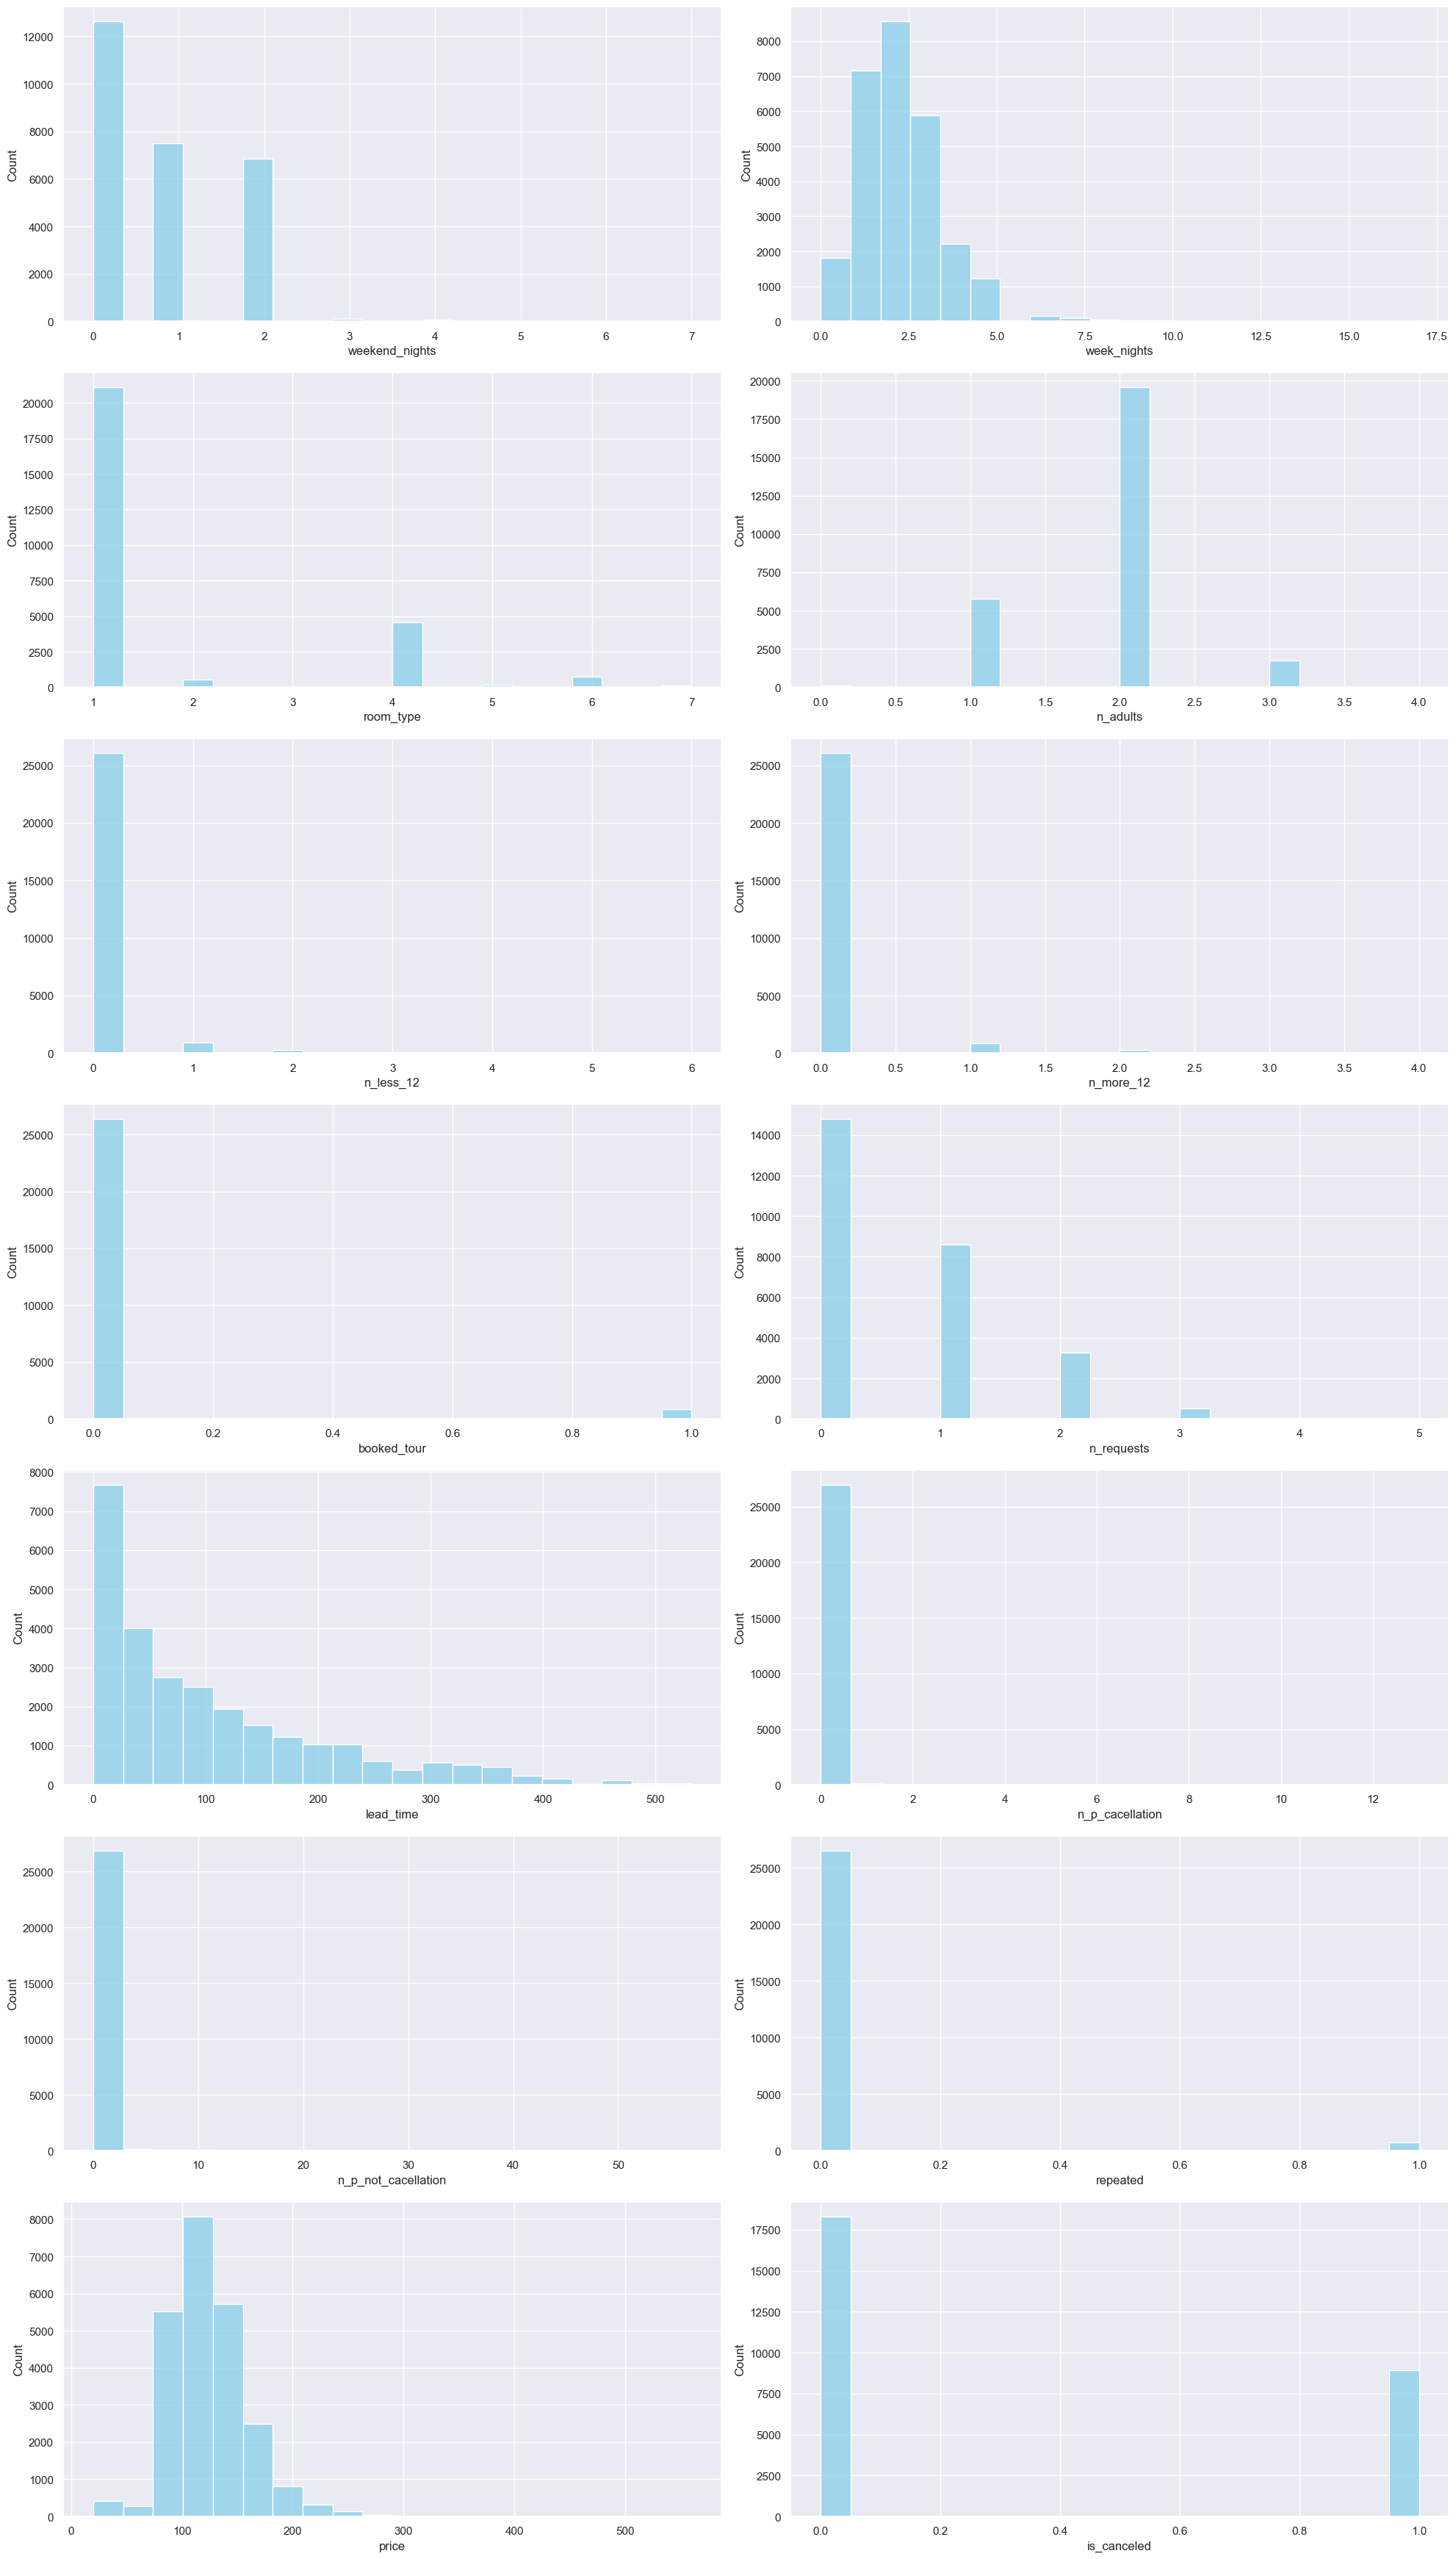

In [16]:
num_cols = 2
num_rows = (len(numeric_col) + num_cols - 1) // num_cols  # Ceiling division

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

for idx, col in enumerate(numeric_col):
    row = idx // num_cols
    col_idx = idx % num_cols
    sns.histplot(numeric_data[col], bins=20, color='skyblue', ax=axes[row, col_idx])

# Remove any empty subplots if the number of columns is not even
for i in range(len(numeric_col), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

*לגבי ההערה הזו וההערה הבאה שהוספתי צריך שתוודא אותי   ~~~ DELETE
* כרגע נראה בסדר, אדע יותר בהמשך החקירה של ה-data       ~~~ DELETE

From the histograms above it looks like 'week_nights', 'n_adults' and 'price' are normal distributed whereas the other attributes are not. Moreover, we can see that 'room_type' has only few values with importance to the order (assumption) i.e. it's a categorical ordinal attribute.

#### Skweness

In [17]:
# Calculate skewness for each column and store in a dictionary
skewness_dict = {col: numeric_data[col].skew(axis=0, skipna=True) for col in numeric_col}

# Sort the dictionary by skewness values in descending order
sorted_skewness = {k: v for k, v in sorted(skewness_dict.items(), key=lambda item: item[1], reverse=True)}

# Print the sorted skewness values
for col, skew in sorted_skewness.items():
    print(f'{col} skewness: {skew}')

n_p_cacellation skewness: 26.0690397337534
n_p_not_cacellation skewness: 19.07680621229512
repeated skewness: 5.905877062919078
n_less_12 skewness: 5.749665488234375
n_more_12 skewness: 5.569096359968911
booked_tour skewness: 5.341578775705141
room_type skewness: 1.725495758860717
week_nights skewness: 1.5422954469230514
lead_time skewness: 1.291447308852505
n_requests skewness: 1.1437446108569245
is_canceled skewness: 0.7343329511244617
weekend_nights skewness: 0.7187888765659908
price skewness: 0.682392611272259
n_adults skewness: -0.32416096529704014


~~~ DELETE *As we can see at the graphs and from the skewness calculation,'n_less_12' and 'n_more_12' column have long right tail that indicate on asymmrtric distribution while 'price' and 'weekend_nights' are more symmetric.

#### probability

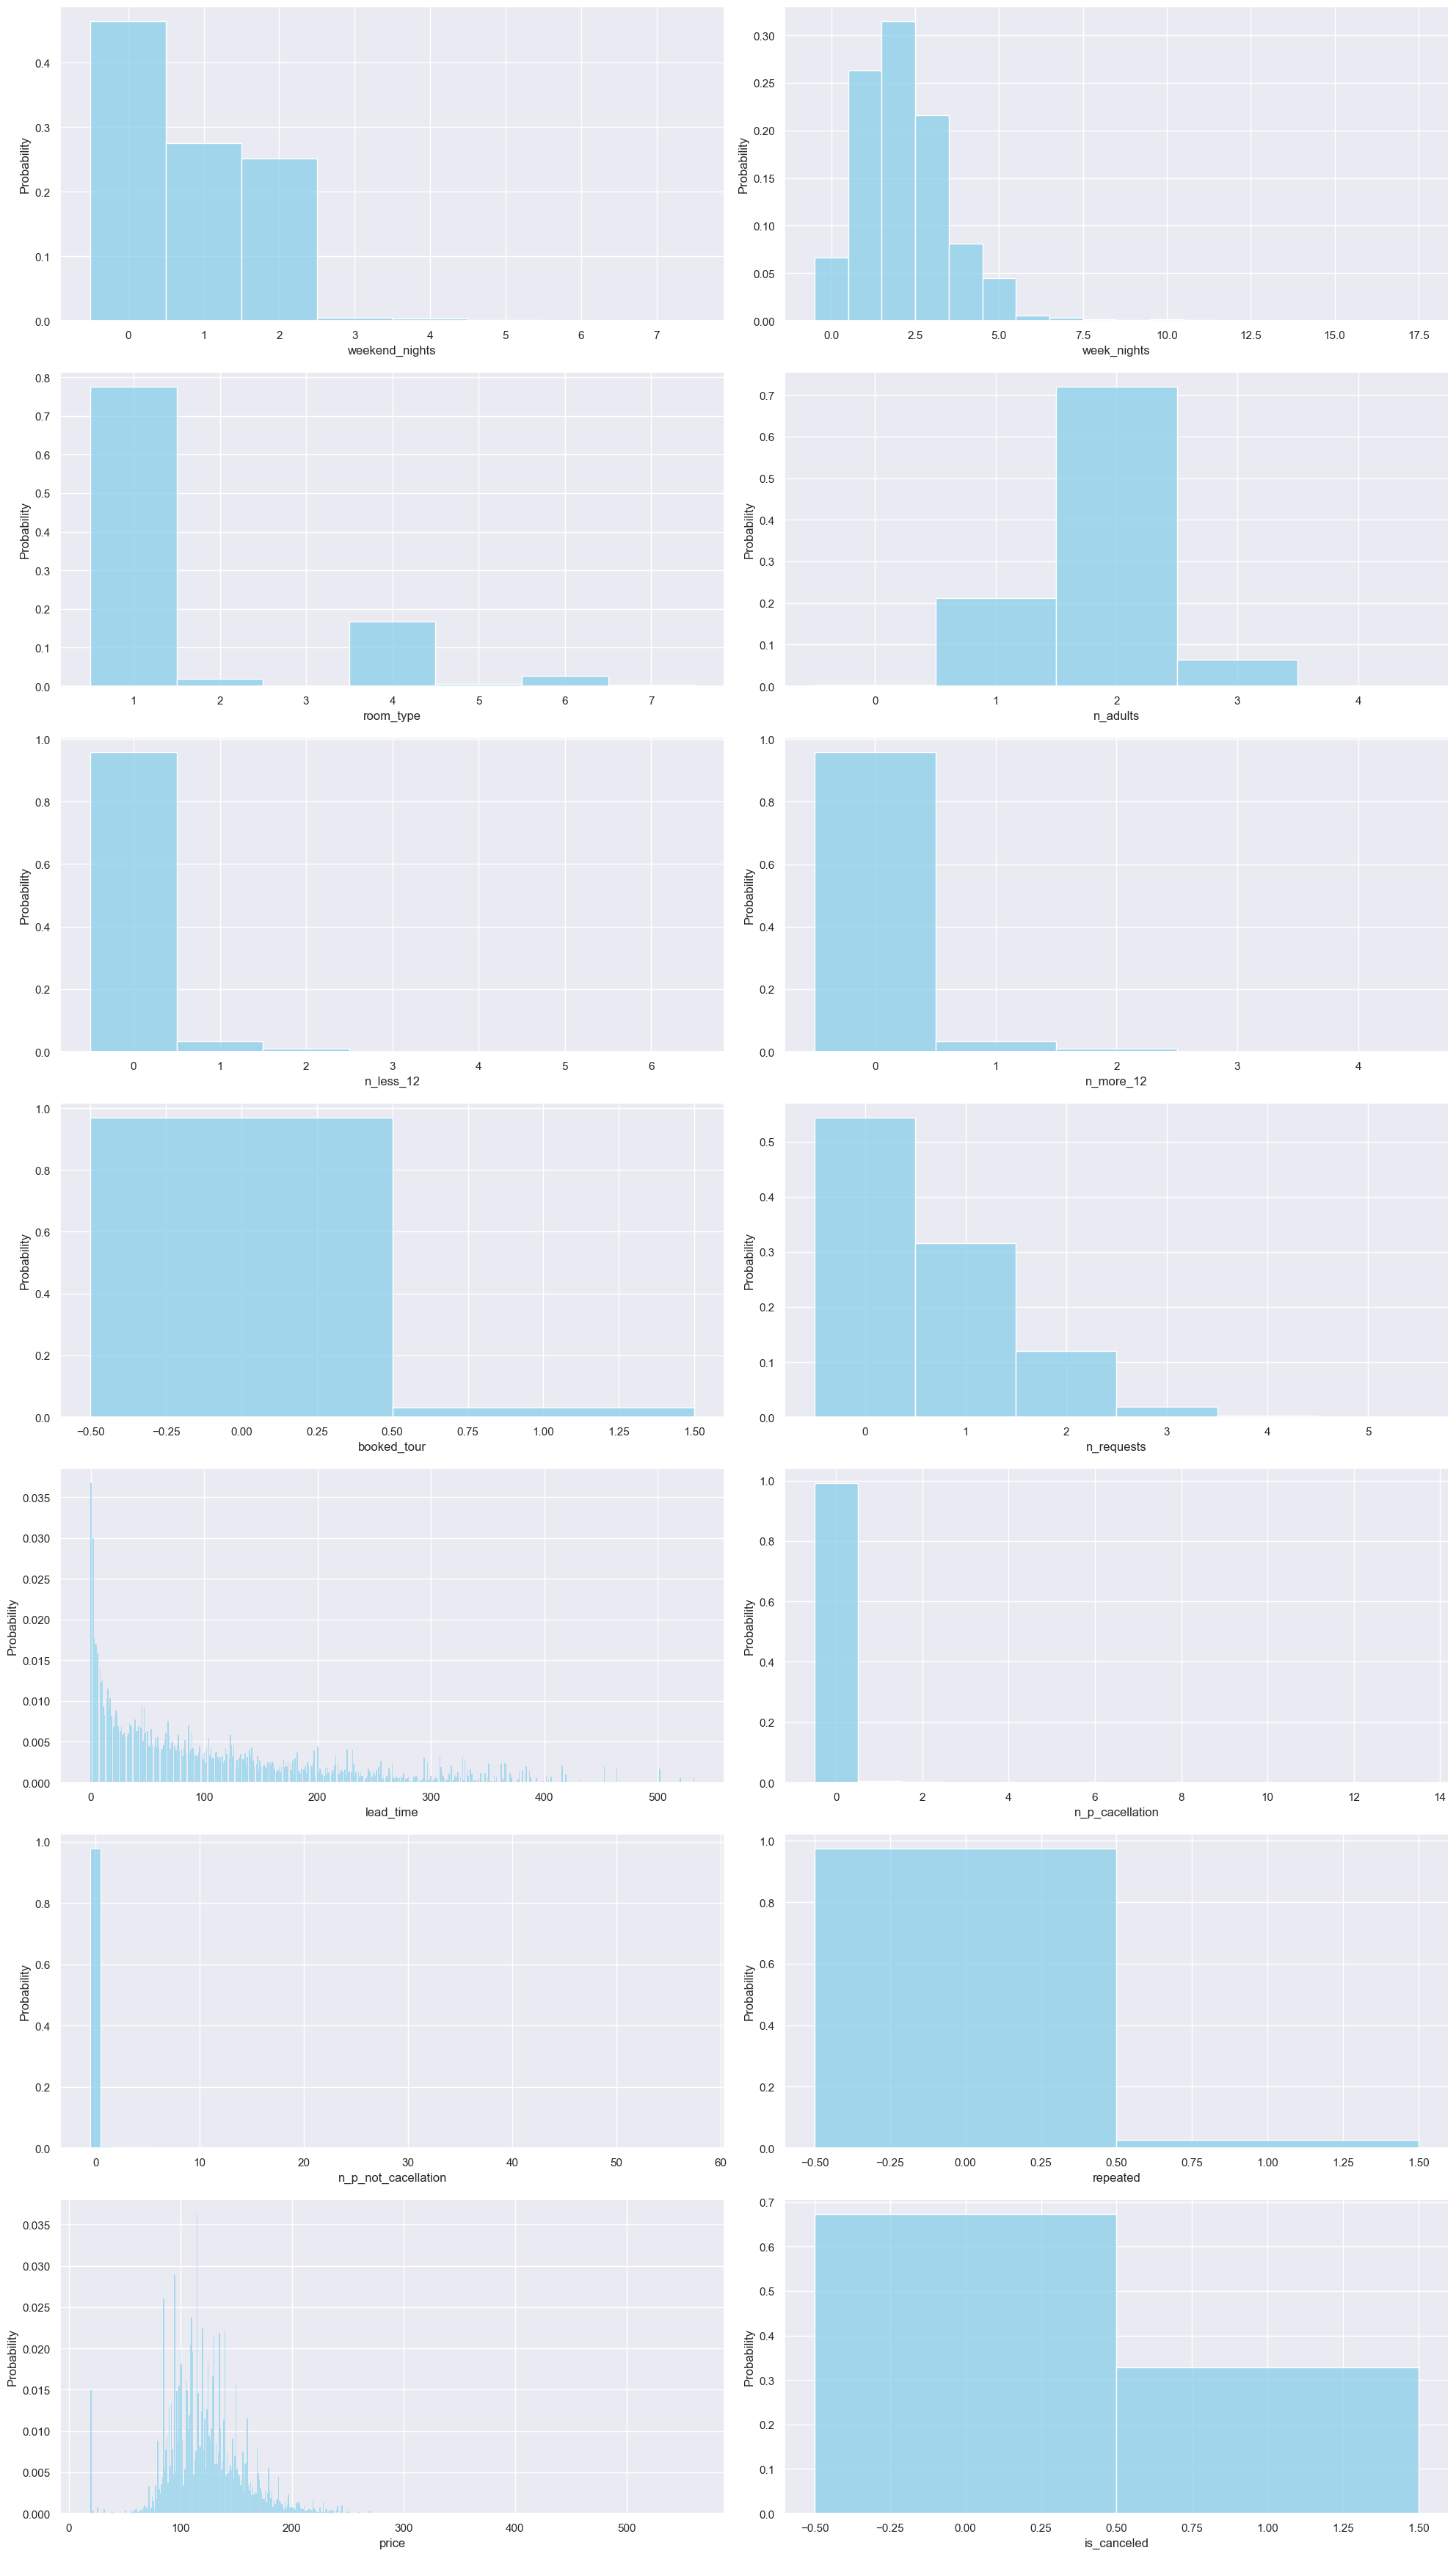

In [18]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

for idx, col in enumerate(numeric_col):
    row = idx // num_cols
    col_idx = idx % num_cols
    sns.histplot(numeric_data[col], color='skyblue', stat="probability", discrete=True, ax=axes[row, col_idx])

# Remove any empty subplots if the number of columns is not even
for i in range(len(numeric_col), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

#### Categorial attributes

In [19]:
print(numeric_data['room_type'].value_counts().sort_index())

room_type
1    21084
2      511
3        3
4     4571
5      180
6      741
7      123
Name: count, dtype: int64


<Axes: ylabel='price'>

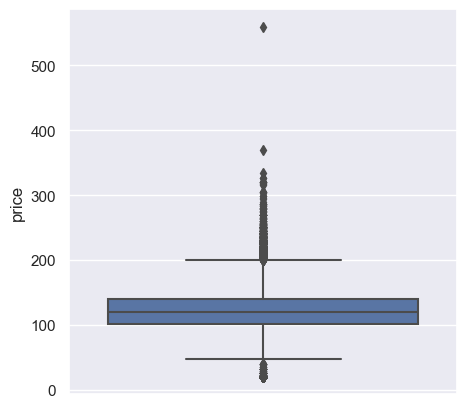

In [20]:
sns.boxplot(y="price", data=train_df)

### Target

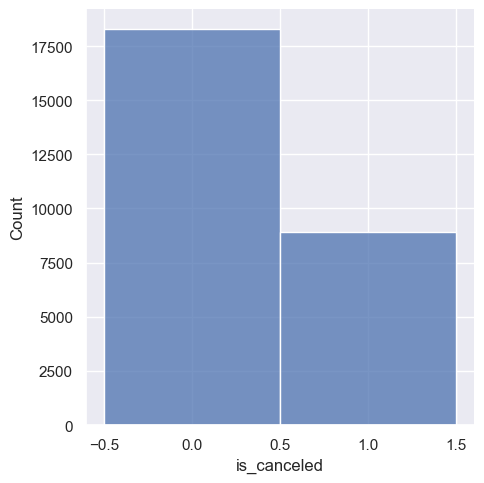

In [21]:
sns.displot(train_target, x='is_canceled', discrete=True)

#### Pie chart

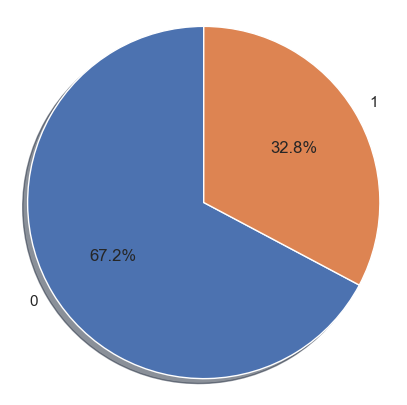

In [22]:
fig1, ax1 = plt.subplots()
ax1.pie(train_target['is_canceled'].value_counts(), labels=train_target['is_canceled'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

## 3. Attributes correlations

In [23]:
corr_matrix = train_df[train_df.describe().columns].corr(method = 'pearson')  # check for correlation, more then +-0.3 there is a little bit connection
corr_matrix

weekend_nights  week_nights  room_type  n_adults  \
weekend_nights             1.000000     0.172582   0.060986  0.106355   
week_nights                0.172582     1.000000   0.093326  0.105197   
room_type                  0.060986     0.093326   1.000000  0.270896   
n_adults                   0.106355     0.105197   0.270896  1.000000   
n_less_12                  0.019048     0.009291   0.276393 -0.005528   
n_more_12                  0.020736     0.020412   0.278152 -0.022964   
booked_tour               -0.033336    -0.052188   0.039589  0.009166   
n_requests                 0.060688     0.046046   0.145410  0.188380   
lead_time                  0.045434     0.149524  -0.106801  0.096608   
n_p_cacellation           -0.023784    -0.027565  -0.006050 -0.046387   
n_p_not_cacellation       -0.029500    -0.048246  -0.009804 -0.124772   
repeated                  -0.072326    -0.100375  -0.023882 -0.199585   
price                     -0.000601     0.020085   0.469287  0.301024   
is_canceled                0.066571     0.093008   0.026948  0.087098   
board_type_num             0.019542     0.018099   0.055224 -0.012657   
purchase_type_num          0.038847     0.023021   0.044304  0.088055   

                     n_less_12  n_more_12  booked_tour  n_requests  lead_time  \
weekend_nights        0.019048   0.020736    -0.033336    0.060688   0.045434   
week_nights           0.009291   0.020412    -0.052188    0.046046   0.149524   
room_type             0.276393   0.278152     0.039589    0.145410  -0.106801   
n_adults             -0.005528  -0.022964     0.009166    0.188380   0.096608   
n_less_12             1.000000   0.125932     0.036395    0.094793  -0.040479   
n_more_12             0.125932   1.000000     0.020203    0.099084  -0.033408   
booked_tour           0.036395   0.020203     1.000000    0.091335  -0.062729   
n_requests            0.094793   0.099084     0.091335    1.000000  -0.099829   
lead_time            -0.040479  -0.033408    -0.062729   -0.099829   1.000000   
n_p_cacellation      -0.012620  -0.012587     0.021167    0.000753  -0.047808   
n_p_not_cacellation  -0.015822  -0.017378     0.068105    0.030748  -0.080618   
repeated             -0.025912  -0.029303     0.113914   -0.009791  -0.139704   
price                 0.257406   0.252388     0.057756    0.179417  -0.063702   
is_canceled           0.022208   0.023083    -0.086230   -0.250765   0.436932   
board_type_num        0.011050   0.015990     0.011106    0.020431  -0.047615   
purchase_type_num     0.028389   0.023280    -0.007997    0.095061  -0.002165   

                     n_p_cacellation  n_p_not_cacellation  repeated     price  \
weekend_nights             -0.023784            -0.029500 -0.072326 -0.000601   
week_nights                -0.027565            -0.048246 -0.100375  0.020085   
room_type                  -0.006050            -0.009804 -0.023882  0.469287   
n_adults                   -0.046387            -0.124772 -0.199585  0.301024   
n_less_12                  -0.012620            -0.015822 -0.025912  0.257406   
n_more_12                  -0.012587            -0.017378 -0.029303  0.252388   
booked_tour                 0.021167             0.068105  0.113914  0.057756   
n_requests                  0.000753             0.030748 -0.009791  0.179417   
lead_time                  -0.047808            -0.080618 -0.139704 -0.063702   
n_p_cacellation             1.000000             0.473422  0.384761 -0.062945   
n_p_not_cacellation         0.473422             1.000000  0.545708 -0.120896   
repeated                    0.384761             0.545708  1.000000 -0.180356   
price                      -0.062945            -0.120896 -0.180356  1.000000   
is_canceled                -0.036572            -0.062216 -0.110125  0.144509   
board_type_num              0.015127             0.022645  0.025414 -0.026065   
purchase_type_num          -0.014643            -0.062805 -0.097820  0.187884   

                     is

Visualization of the correlation matrix

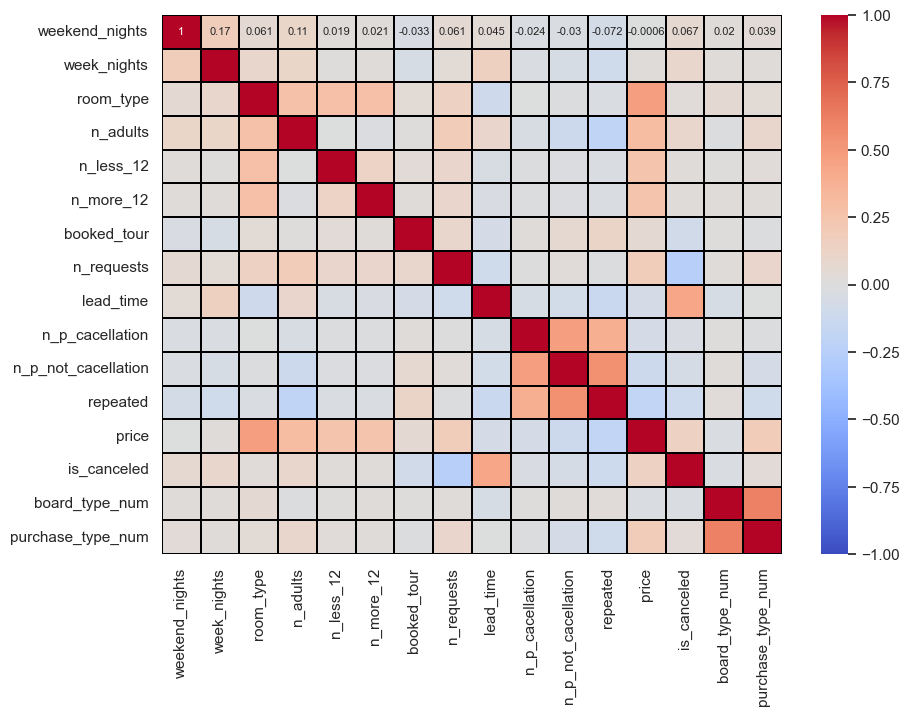

In [24]:
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black', annot_kws={'size': 8})

We can see that the attribute with the strongest correlation to our target value 'is_canceled' is 'lead_time'.

Moreover we can see strong correlation between 'room_type' and 'price' which is obvious because some of the room types cost more than others. 
Other strong correlations we can see between 'n_p_cacellation' and 'n_p_not_cacellation, and between 'n_p_not_cacellation and 'repeated'(and also smaller correlation between 'repeated' and 'n_p_cacellation').

Those three attributes describe:

    • 'repeated': indicates whether the reservation is a repeat reservation
    • 'n_p_cacellation': number of previous reservations that were canceled by the customer prior to the current reservation
    • 'n_p_not_cacellation': number of previous reservations not canceled by the customer prior to the current reservation 
It's making sense those three have correlation because just if reservation is a repeat reservation there is a chance that the customer had prior reservation which might got canceled (and then increase the 'n_p_cacellation' or not and then increase the attribute 'n_p_not_cacellation').

We can see other smaller correlation between 'n_adults' and 'price' which also obvious because when you have more adults the price getting higher. 

## 4. Interesting insights from the data

As been said in the privous note - the attribute with the strongest correlation to our target value 'is_canceled' is 'lead_time'.

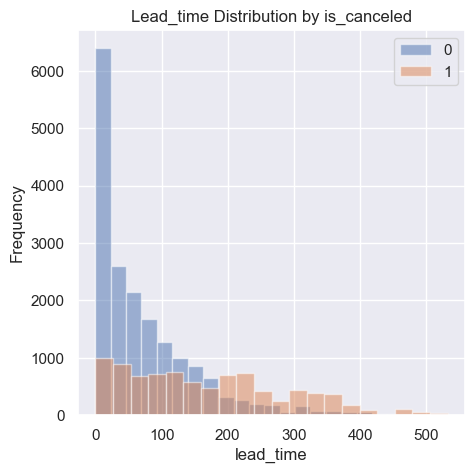

In [25]:
train_df.groupby('is_canceled')['lead_time'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('lead_time')
plt.ylabel('Frequency')
plt.title('Lead_time Distribution by is_canceled')
plt.show()

'lead_time' represents the number of days between the reservation date and the arrival date.
We can see from the above plot and the correlation that when the lead time is greater - there are more chances the reservation will get canceled.



## 5. Data Cleaning

Now, we are going to investigate the given dataset, and search for problems in the data such as missing values and inconsistency.

We are going to start with handling the missing values and checking for data types.

In [26]:
# Check for missing values in the training dataset
missing_values_count = train_df.isnull().sum()
missing_values_percentage = (train_df.isnull().sum() / train_df.shape[0]) * 100

# Combine the counts and percentages into a DataFrame
missing_values_df = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

# Display the columns with missing values
missing_values_df = missing_values_df[missing_values_df['Missing Values Count'] > 0]

print(missing_values_df)



               Missing Values Count  Missing Values Percentage
board_type                     8168                  30.015066
lead_time                       419                   1.539705
purchase_type                  4847                  17.811340
price                          3405                  12.512402


We can see that in the training set there are missing values in the attributes - board_type, lead_time, purchase_type and price.
We can determine that there is a significant missing values in the attributes - board_type purchase_type and price, and the most significant is in the board_type attribute.
We will fill missing values for categorical variables with the mode, and Fill missing values for numerical variables with the median.

For class  1  the median is  114.5
For class  1  the mean is  115.88661138211383
and the number of missing values is  2634 out of  21084 rows
For class  2  the median is  105.85499999999999
For class  2  the mean is  108.92675438596491
and the number of missing values is  55 out of  511 rows
For class  3  the median is  100.75
For class  3  the mean is  111.91666666666667
and the number of missing values is  0 out of  3 rows
For class  4  the median is  147.65
For class  4  the mean is  145.5463647767185
and the number of missing values is  585 out of  4571 rows
For class  5  the median is  139.4
For class  5  the mean is  143.66717948717948
and the number of missing values is  24 out of  180 rows
For class  6  the median is  200.2
For class  6  the mean is  200.2548049921997
and the number of missing values is  100 out of  741 rows
For class  7  the median is  212.245
For class  7  the mean is  174.05896551724138
and the number of missing values is  7 out of  123 rows
There are no mis

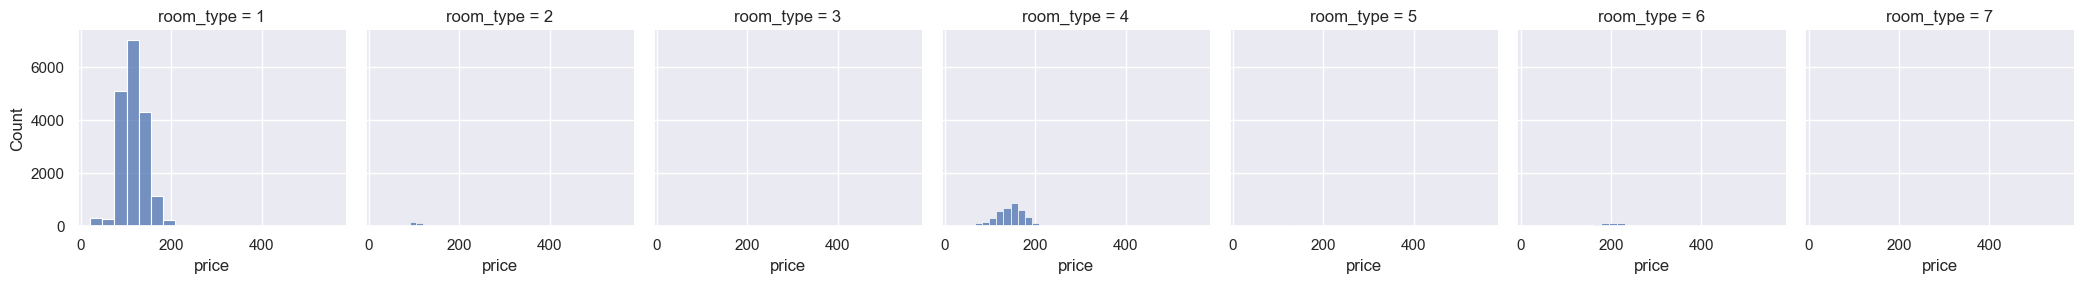

In [27]:
# Fill missing values for categorical variables with the mode   ----> Check this
train_df['board_type'].fillna(train_df['board_type'].mode()[0], inplace=True)
train_df['purchase_type'].fillna(train_df['purchase_type'].mode()[0], inplace=True)

# Fill missing values for numerical variables with the median ---> Check this
train_df['lead_time'].fillna(train_df['lead_time'].median(), inplace=True)


# Fill missing values of 'price' by its correlation with 'room_type' - by the correlation matrix we see that the correlation is 0.47
# therefore it is an option to divide into groups, conforming to this attribute, and in each group we will complete the value according to the
# statistics.
g = sns.FacetGrid(train_df, col="room_type")
g.map_dataframe(sns.histplot, x="price", bins=20)

for i in sorted(train_df['room_type'].unique()):
    print('For class ', i, ' the median is ', train_df.loc[train_df['room_type']==i,
        'price'].median())
    print('For class ', i, ' the mean is ', train_df.loc[train_df['room_type']==i,
        'price'].mean())
    print('and the number of missing values is ',
        train_df.loc[train_df['room_type']==i , 'price'].isnull().sum(),
        'out of ',(train_df['room_type']==i).sum(), 'rows')
    

# We see that we got that class 3 of 'room_type', there are any missing values for 'price',
# therefore we will skip it. The rest will be filled by the probability function of every class.

# Calculate mean and standard deviation for each room_type:
mu_sigma = {}
for room_type in sorted(train_df['room_type'].unique()):
    mu = train_df.loc[train_df['room_type'] == room_type, 'price'].mean()
    sigma = train_df.loc[train_df['room_type'] == room_type, 'price'].std()
    mu_sigma[room_type] = (mu, sigma)

# Define a function to fill missing 'price' values based on 'room_type'
def fill_missing_price(row):
    if pd.isna(row['price']):
        room_type = row['room_type']
        if room_type in mu_sigma:
            mu, sigma = mu_sigma[room_type]
            return np.random.normal(mu, sigma)
    else:
        return row['price']

# Apply the function to the DataFrame
train_df['price'] = train_df.apply(fill_missing_price, axis=1)


# Verify if missing values have been handled
missing_values = train_df.isnull().sum()

if missing_values.any():
    print("There are missing values in the following columns:")
    print(missing_values[missing_values > 0])
else:
    print("There are no missing values in the DataFrame now.")

We see that now we complete the missing values, with reliable values.

## 6.  Add / Delete Attributes

We can notice that the 'ID' attribute is just a generic string which give us no information, so we already deleted this attribute.

Moreover, in order to analyze the data regards to the 'date' attribute, we will split the 'date' attribute into three new nominal categorical attributes- 'day_date', 'month_date', 'year_date'.
We see, for example, impossible date, such as 2018-2-29, which is invalid because 29 on February can be only in leap years, and 2018 is not a leap year. Such dates are handled as NaT values, and we drop all the  raws with NaT value, since there are not many of them and because it is almost impossible to fix them correctly. 

In [28]:
# Convert 'date' column to datetime format with flexible parsing and handle invalid dates
train_df['date'] = pd.to_datetime(train_df['date'], errors='coerce', infer_datetime_format=True)

# Handle NaT values (e.g., drop rows with NaT values)
train_df = train_df.dropna(subset=['date'])

# Extract components into new columns
train_df['year'] = train_df['date'].dt.year.astype(int).astype(str)
train_df['month'] = train_df['date'].dt.month.astype(int).astype(str)
train_df['day'] = train_df['date'].dt.day.astype(int).astype(str)

# Drop the original 'date' column
train_df.drop(columns=['date'], inplace=True)

print("DataFrame with extracted components:")
print(train_df.columns)

DataFrame with extracted components:
Index(['weekend_nights', 'week_nights', 'room_type', 'board_type', 'n_adults',
       'n_less_12', 'n_more_12', 'booked_tour', 'n_requests', 'lead_time',
       'purchase_type', 'n_p_cacellation', 'n_p_not_cacellation', 'repeated',
       'price', 'is_canceled', 'board_type_num', 'purchase_type_num', 'year',
       'month', 'day'],
      dtype='object')


Now, we will check the data types and address inconsistencies.

In [29]:
# Check data types of the columns
data_types = train_df.dtypes
print(data_types)

# Check for mixed data types in each column
have_dup = 0
for column in train_df.columns:
    unique_types = train_df[column].apply(type).nunique()
    if unique_types > 1:
        have_dup = 1
        print(f'Column {column} has mixed data types')
if have_dup == 0:
    print("There are any duplicate columns.")

weekend_nights           int64
week_nights              int64
room_type                int32
board_type              object
n_adults                 int64
n_less_12                int64
n_more_12                int64
booked_tour              int64
n_requests               int64
lead_time              float64
purchase_type           object
n_p_cacellation          int64
n_p_not_cacellation      int64
repeated                 int64
price                  float64
is_canceled              int64
board_type_num            int8
purchase_type_num         int8
year                    object
month                   object
day                     object
dtype: object
There are any duplicate columns.


We can see that we don't have any mixed data types for every given attribute.

Columns with strings are stored with the 'object' type. 
We can see that there are some inconsistencies at the board_type, purchase_type, date attributes.
We can see that we don't have mixed data types. We also don't have any duplicate raws.


## 7. Data transformation

Now we will do normalization to numierical attributes using  and discretization.

In [30]:
# Identify numerical, binary, and categorical columns
numerical_cols = train_df.select_dtypes(include=['int32','int64', 'float64']).columns
categorical_cols = [x for x in train_df.columns if x not in numerical_cols] # ['board_type', 'purchase_type', 'year_date', 'month_date', 'day_date']

# Normalization (Min-Max Scaling) for numerical attributes
scaler = MinMaxScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Initialize LabelEncoder for categorical attributes
le = LabelEncoder()

# Apply LabelEncoder to each component
train_df['year'] = le.fit_transform(train_df['year'])
train_df['month'] = le.fit_transform(train_df['month'])
train_df['day'] = le.fit_transform(train_df['day'])

print(train_df)


       weekend_nights  week_nights  room_type  board_type  n_adults  \
0            0.142857     0.294118        0.0  half board      0.50   
1            0.000000     0.176471        0.0  half board      0.50   
2            0.000000     0.117647        0.5  half board      0.25   
3            0.142857     0.117647        0.0  half board      0.50   
4            0.142857     0.176471        0.5  half board      0.50   
...               ...          ...        ...         ...       ...   
27208        0.142857     0.117647        0.0  half board      0.75   
27209        0.000000     0.235294        0.0  half board      0.50   
27210        0.000000     0.117647        0.0  half board      0.50   
27211        0.142857     0.000000        0.5  half board      0.25   
27212        0.000000     0.117647        0.0   breakfast      0.50   

       n_less_12  n_more_12  booked_tour  n_requests  lead_time  ...  \
0            0.0       0.00          0.0         0.4   0.063910  ...   
1  

## 8. Implementation of the Pre-Process: Test Dataset

In [31]:
# Implement the pre-process on the attached test dataset and describe what adjustments
# you made.

## 9. Splitting Data to Train and Validation Set and Using of Cross-Validation Method

In [32]:
# Splitting the features (X) and results (y) for train and validation.
# We determine the seed to be 42 and also 0.25 of all the original training data will be now our validation.
X = train_df.drop(['is_canceled'], axis=1)
X = X.drop(['board_type'], axis=1)
X = X.drop(['purchase_type'], axis=1)
y = train_df['is_canceled']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=42) 

# for cross validation we will use 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)
X.head()

weekend_nights  week_nights  room_type  n_adults  n_less_12  n_more_12  \
0        0.142857     0.294118        0.0      0.50        0.0       0.00   
1        0.000000     0.176471        0.0      0.50        0.0       0.00   
2        0.000000     0.117647        0.5      0.25        0.0       0.00   
3        0.142857     0.117647        0.0      0.50        0.0       0.00   
4        0.142857     0.176471        0.5      0.50        0.0       0.25   

   booked_tour  n_requests  lead_time  n_p_cacellation  n_p_not_cacellation  \
0          0.0         0.4   0.063910              0.0                  0.0   
1          0.0         0.0   0.686090              0.0                  0.0   
2          0.0         0.2   0.278195              0.0                  0.0   
3          0.0         0.0   0.943609              0.0                  0.0   
4          0.0         0.4   0.060150              0.0                  0.0   

   repeated     price  board_type_num  purchase_type_num  year  month  day  
0       0.0  0.285646               2                  4     3      2   20  
1       0.0  0.321098              -1                 -1     3      2   22  
2       0.0  0.331361               2                  4     3      7   27  
3       0.0  0.315068              -1                  3     3     11   18  
4       0.0  0.288177               2                  3     2      1   10

## 10. Evaluation Metrics

The most appropriate evaluation metrics for this problem, similarly to what we saw in class, are the Accuracy and the ROC AUC.
They are the most appropriate metrics for this problem because they together offer a complete picture of model performance. Accuracy provides a simple measure of overall correctness, while ROC AUC ensures the model's performance is evaluated in distinguishing between bookings that are canceled and those that are not, even in the presence of any class imbalance.

### Classification Decision Tree (classifier a):

In [33]:
# Create Decision Tree classifer object
clf_a = DecisionTreeClassifier(random_state=42) 

# Train Decision Tree Classifer 
clf_a = clf_a.fit(X_train,y_train)

# Predict the label
y_pred_a = clf_a.predict(X_validation)

In [34]:
print(f"Accuracy of model on validation set: {accuracy_score(y_validation, y_pred_a)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, clf_a.predict(X_train))}")

Accuracy of model on validation set: 0.8365455347947623
Accuracy of model on training set: 0.9964196380401197


#### We can see overfitting here
Configure a better model by limits the size of the tree.

In [45]:
clf_a = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8,
                              min_samples_split=10, min_samples_leaf=5, random_state=42) 

clf_a = clf_a.fit(X_train,y_train)
y_pred_a = clf_a.predict(X_validation)

print(f"Accuracy of model on validation set: {accuracy_score(y_validation, y_pred_a)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, clf_a.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, y_pred_a)}")
print(f"classification report :\n{classification_report(y_validation,y_pred_a)}")

y_probs_a = clf_a.predict_proba(X_validation) # probability prediction
fpr_a, tpr_a, threshold = roc_curve(y_validation, y_probs_a[:,1])
auc_a = auc(fpr_a, tpr_a)

Accuracy of model on validation set: 0.833603060173606
Accuracy of model on training set: 0.8441316396095934
Confusion matrix on validation set:
[[4052  517]
 [ 614 1614]]
classification report :
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      4569
         1.0       0.76      0.72      0.74      2228

    accuracy                           0.83      6797
   macro avg       0.81      0.81      0.81      6797
weighted avg       0.83      0.83      0.83      6797



we can see the accuracy of the model similar to the accuracy on the train so there is no more overfitting

#### Decision tree visualization
One of the decision trees advantages is the ability to visualize the decision rules and therefore they are easy to understand and interpret. 



In [36]:
dot = export_graphviz(clf_a, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('./tree1.png')
Image(graph.create_png())

### SVM classifier (classifier b):

In [37]:
clf_b = svm.SVC(kernel='rbf', C=0.9, probability=True)
clf_b.fit(X_train, y_train)
y_pred_b = clf_b.predict(X_validation)

print(f"Accuracy of model on validation set: {accuracy_score(y_validation, y_pred_b)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, clf_b.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, y_pred_b)}")
print(f"classification report :\n{classification_report(y_validation,y_pred_b)}")

y_probs_b = clf_b.predict_proba(X_validation) # probability prediction
fpr_b, tpr_b, threshold = roc_curve(y_validation, y_probs_b[:,1])
auc_b = auc(fpr_b, tpr_b)

Accuracy of model on validation set: 0.7319405620126527
Accuracy of model on training set: 0.7231840698415812
Confusion matrix on validation set:
[[4498   71]
 [1751  477]]
classification report :
              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83      4569
         1.0       0.87      0.21      0.34      2228

    accuracy                           0.73      6797
   macro avg       0.80      0.60      0.59      6797
weighted avg       0.77      0.73      0.67      6797



### Naive Bayes classifier (classifier c):

In [38]:
clf_c = GaussianNB()  # assuming the featers have normal gaussian distrubtion
clf_c.fit(X_train, y_train)
y_pred_c = clf_c.predict(X_validation)

print(f"Accuracy of model on validation set: {accuracy_score(y_validation, y_pred_c)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, clf_c.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, y_pred_c)}")
print(f"classification report :\n{classification_report(y_validation,y_pred_c)}")

y_probs_c = clf_c.predict_proba(X_validation) # probability prediction
fpr_c, tpr_c, threshold = roc_curve(y_validation, y_probs_c[:,1])
auc_c = auc(fpr_c, tpr_c)

Accuracy of model on validation set: 0.40959246726496984
Accuracy of model on training set: 0.4083574476433371
Confusion matrix on validation set:
[[ 585 3984]
 [  29 2199]]
classification report :
              precision    recall  f1-score   support

         0.0       0.95      0.13      0.23      4569
         1.0       0.36      0.99      0.52      2228

    accuracy                           0.41      6797
   macro avg       0.65      0.56      0.37      6797
weighted avg       0.76      0.41      0.32      6797



### Hyperparameter Tuning on decision tree using Grid search
Decision Tree gave the best results and his compute was pretty fast so decided to do wide Hyperparameter tuning on this classifier - We choose to use Grid search and gave pretty wide range of hyperparams because the model is pretty fast.

In [41]:
# Define the parameter grid
max_depth = [int(x) for x in range(5, 30)]  
min_samples_split = [1, 2, 3, 4, 5, 10, 13, 15, 17, 20]
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 10, 15]

param_grid = {
    'criterion': ['entropy'],
    'splitter': ['best'],
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Initialize GridSearchCV
tree_grid_search = GridSearchCV(estimator=clf_a, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search with cross-validation on the training set
tree_grid_search.fit(X_train, y_train)

# Extract the best parameters and estimator
tree_best_params = tree_grid_search.best_params_
tree_best_grid = tree_grid_search.best_estimator_

# Fit the best estimator on the entire training set
tree_best_grid.fit(X_train, y_train)

# Predict with the best estimator on the validation set
grid_y_pred = tree_best_grid.predict(X_validation)

# Evaluate the accuracy on the validation set
print(f"Best parameters: {tree_best_params}")
print(f"Accuracy of model on validation set: {accuracy_score(y_validation, grid_y_pred)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, tree_best_grid.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, grid_y_pred)}")
print(f"classification report :\n{classification_report(y_validation,grid_y_pred)}")

y_probs_a2 = clf_a.predict_proba(X_validation) # probability prediction
fpr_a2, tpr_a2, threshold = roc_curve(y_validation, y_probs_a2[:,1])
auc_a2 = auc(fpr_a2, tpr_a2)

Fitting 5 folds for each of 2250 candidates, totalling 11250 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 17, 'splitter': 'best'}
Accuracy of model on validation set: 0.8544946299838164
Accuracy of model on training set: 0.8748835156211683
Confusion matrix on validation set:
[[4132  437]
 [ 552 1676]]
classification report :
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      4569
         1.0       0.79      0.75      0.77      2228

    accuracy                           0.85      6797
   macro avg       0.84      0.83      0.83      6797
weighted avg       0.85      0.85      0.85      6797



### Hyperparameter Tuning on SVM using Grid search
SVM gave a little bit lower results in compare to the Decision tree and his running time was very long so we did smaller hyperparameter tuning here.

In [42]:
# Define the parameter grid
param_grid = {'kernel': ['rbf'],
    'C': [0.8, 0.85, 0.9, 0.95] ,
    'probability': [True]}

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(estimator=clf_b, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search with cross-validation on the training set
svm_grid_search.fit(X_train, y_train)

# Extract the best parameters and estimator
svm_best_params = svm_grid_search.best_params_
svm_best_grid = svm_grid_search.best_estimator_

# Fit the best estimator on the entire training set
svm_best_grid.fit(X_train, y_train)

# Predict with the best estimator on the validation set
grid_y_pred = svm_best_grid.predict(X_validation)

# Evaluate the accuracy on the validation set
print(f"Best parameters: {svm_best_params}")
print(f"Accuracy of model on validation set: {accuracy_score(y_validation, grid_y_pred)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, svm_best_grid.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, grid_y_pred)}")
print(f"classification report :\n{classification_report(y_validation,grid_y_pred)}")

y_probs_b2 = clf_b.predict_proba(X_validation) # probability prediction
fpr_b2, tpr_b2, threshold = roc_curve(y_validation, y_probs_b2[:,1])
auc_b2 = auc(fpr_b2, tpr_b2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'C': 0.95, 'kernel': 'rbf', 'probability': True}
Accuracy of model on validation set: 0.7359129027512138
Accuracy of model on training set: 0.726421109421747
Confusion matrix on validation set:
[[4482   87]
 [1708  520]]
classification report :
              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83      4569
         1.0       0.86      0.23      0.37      2228

    accuracy                           0.74      6797
   macro avg       0.79      0.61      0.60      6797
weighted avg       0.77      0.74      0.68      6797



### ROC curve comparison

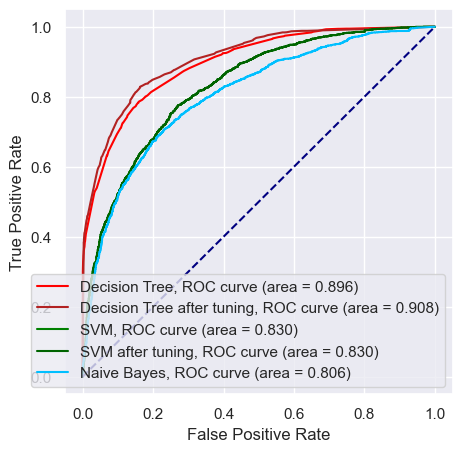

In [47]:
plt.figure()
plt.plot(fpr_a, tpr_a, color='red', label='Decision Tree, ROC curve (area = %0.3f)' %  auc_a)
plt.plot(fpr_a2, tpr_a2, color='firebrick', label='Decision Tree after tuning, ROC curve (area = %0.3f)' %  auc_a2)
plt.plot(fpr_b, tpr_b, color='green', label='SVM, ROC curve (area = %0.3f)' %  auc_b)
plt.plot(fpr_b, tpr_b, color='darkgreen', label='SVM after tuning, ROC curve (area = %0.3f)' %  auc_b2)
plt.plot(fpr_c, tpr_c, color='deepskyblue', label='Naive Bayes, ROC curve (area = %0.3f)' %  auc_c)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()